<table class="tfo-notebook-buttons" align="left">

  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/1NMHorcfpS2A4KvUUIL2_1vsEjqLiRerZ#scrollTo=3jgKv2lqtyXY"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/IshtarMM/Practical_Course"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View sources on GitHub</a>
  </td>
  <td>
    <a href="https://downgit.github.io/#/home?url=https://github.com/IshtarMM/Practical_Course/blob/master/dataanalysis-3.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
   <td>
    <a target="_blank" href="https://uni-tuebingen.de/fakultaeten/mathematisch-naturwissenschaftliche-fakultaet/fachbereiche/zentren/zentrum-fuer-molekularbiologie-der-pflanzen/research/mikrobielle-interaktionen/gruppe/"><img src="https://uni-tuebingen.de/fileadmin/_processed_/f/a/csm_IMG_4015_35e7b6c800.jpg"width="30" height="30"/> Kemen lab</a>
  </td>
</table>



#### **>>**In this notebook we are going to do some analysis of amplicon sequencing data. 
#### Look at the following picture to get some idea of the steps.

**A**:  Sequencing and preprocessing 

**B**:  Generate OTU/ASV tables and taxonomy files

**C**: Analysis: Diversity of microbes Association between microbes(networks), Prediction of different status and finding important microbes in prediction(machine learning).























<table class="tfo-notebook-buttons" align="left">

  <td>
    <a target="_blank" href="https://github.com/IshtarMM/Practical_Course"><img src="https://github.com/IshtarMM/Practical_Course/blob/master/Presentation1%20copy.png?raw=true" /></a>
  </td>
</table>

###Check to see if R scripts are working

In [ ]:
print("HelloWorld", quote=FALSE)
getwd()

[1] HelloWorld


[1] "/content"

##Load the otu table ,meta data and taxonomy files

In [ ]:
shell_call <- function(command, ...) {
  result <- system(command, intern = TRUE, ...)
  cat(paste0(result, collapse = "\n"))
}

shell_call("git clone https://github.com/IshtarMM/spp_course22")



Warning message in system(command, intern = TRUE, ...):
“running command 'git clone https://github.com/IshtarMM/spp_course22' had status 128”


In [ ]:
#unlink("Practical_Course", recursive = TRUE)
load("spp_course22/datasets/otutable_taxonomy_metadata/files.RData")
ls()

[1] "ado"                   "agg_tab"               "alpha_div"            
 [4] "anova"                 "col"                   "data"                 
 [7] "data_net"              "melt_tab"              "metadata"             
[10] "p2"                    "p3"                    "p4"                   
[13] "pca_bray_rarefied.tab" "plot_alpha_diversity"  "ra_tab"               
[16] "shell_call"            "tab"                   "tab_sample"           
[19] "tab_taxa"              "tab_taxa1"             "taxonomy"

##Where does the dataset come from and what does it contain?


--> samples were taken from *Arabidopsis thaliana* plants in the wild.
<table>
  <tr>
    <td> <img src="https://github.com/IshtarMM/Practical_Course/blob/master/pic/IMGAra1.jpg?raw=true" height=300 /> </td>
    <td> <img src="https://github.com/IshtarMM/Practical_Course/blob/master/pic/Picture%202.png?raw=true" height=400 /> </td>
  </tr>
</table>

Left: *A. thaliana* plants growing on a natural site.

Right: Leaf surface of *A. thaliana* plant with a fungus and bacteria


Samples were taken over several years and seasons and microbes on the surface of the plant leaves (epiphytes) and microbes inside the same plant leaves were analysed (endophytes).

<img src="https://github.com/IshtarMM/Practical_Course/blob/master/pic/pic4.jpg?raw=true" height=400 />

Plants were further phenotypically screened for infection by the protist pathogen *Albugo laibachii*, the causal agent of white blister rust:

<img src="https://github.com/IshtarMM/Practical_Course/blob/master/pic/pic5.png?raw=true" height=400 />



## Look at to the struture of dataset

In [ ]:
head(data)

,ID,Otu000002,Otu000003,Otu000004,Otu000005,Otu000006,Otu000009,Otu000010,Otu000011,Otu000012,⋯,Otu001143,Otu001144,Otu001145,Otu001146,Otu001147,Otu001148,Otu001149,Otu001150,Otu001151,Otu001152
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
S324,S324,879,1632,22,5,20,678,546,0,1,⋯,0,12,13,3,1,0,0,0,0,0
S164,S164,4410,1123,82,1087,7691,2096,1480,84,0,⋯,10,1,13,4,0,0,0,1,0,0
S400,S400,206,4,32232,0,184,145,21,7,0,⋯,0,0,0,0,0,0,0,0,0,0
S346,S346,230,179,1363,259,1,1969,123,46,6663,⋯,0,0,0,1,0,0,0,0,0,0
S145,S145,45,148,2960,134,21187,0,12,18,1,⋯,0,0,0,0,0,0,0,0,0,0
S568,S568,2654,136,8759,214,415,5556,1334,199,0,⋯,0,0,0,0,0,0,0,0,0,0


In [ ]:
#how many sample and otus are in the data?
print(paste("number of samples = " , nrow(data)))
print(paste("number of OTUS = " , ncol(data)-1))

[1] "number of samples =  101"
[1] "number of OTUS =  1030"


In [ ]:
#Information of samples
head(metadata)

,ID,Compartment,Year,Season,Infection_Stage
,<chr>,<chr>,<int>,<chr>,<chr>
S324,S324,Endo,2016,Fall,Infected
S164,S164,Endo,2016,Spring,Healthy
S400,S400,Endo,2017,Spring,Infected
S346,S346,Endo,2016,Fall,Healthy
S145,S145,Endo,2014,Spring,Infected
S568,S568,Endo,2018,Spring,Healthy


In [ ]:
#How many samples are colected in spring?
table(metadata$Season)

#How many of Fall samples are endophytic ?
table(metadata$Season , metadata$Compartment)


  Fall Spring 
    38     63 

        
         Endo Epi
  Fall     18  20
  Spring   32  31

##<font color='red'>Q1:</font>

##How many infected sample are colected in spring of 2016?

In [ ]:
#Type your answer here

In [ ]:
#Lets see the taxonomy file (Size = number of reads of each otu in all the samples)
head(taxonomy)

,OTU,Size,Taxonomy,Kingdom,Phylum,Class,Order,Family,Genus
,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Otu000002,859665,Bacteria;Proteobacteria;Alphaproteobacteria;Sphingomonadales;Sphingomonadaceae;Sphingomonas;,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomonas
2,Otu000003,291965,Bacteria;Proteobacteria;Alphaproteobacteria;Rhizobiales;Beijerinckiaceae;Methylobacterium-Methylorubrum;,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Beijerinckiaceae,Methylobacterium-Methylorubrum
3,Otu000004,286108,Bacteria;Proteobacteria;Gammaproteobacteria;Burkholderiales;Oxalobacteraceae;Duganella;,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Oxalobacteraceae,Duganella
4,Otu000005,275753,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas;,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas
5,Otu000006,272764,Bacteria;Proteobacteria;Gammaproteobacteria;Pseudomonadales;Pseudomonadaceae;Pseudomonas;,Bacteria,Proteobacteria,Gammaproteobacteria,Pseudomonadales,Pseudomonadaceae,Pseudomonas
6,Otu000009,197946,Bacteria;Bacteroidota;Bacteroidia;Flavobacteriales;Flavobacteriaceae;Flavobacterium;,Bacteria,Bacteroidota,Bacteroidia,Flavobacteriales,Flavobacteriaceae,Flavobacterium


##Let’s plot the total number of reads per samples of each year from otu table:

In [ ]:
#install required package(ggplot)
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



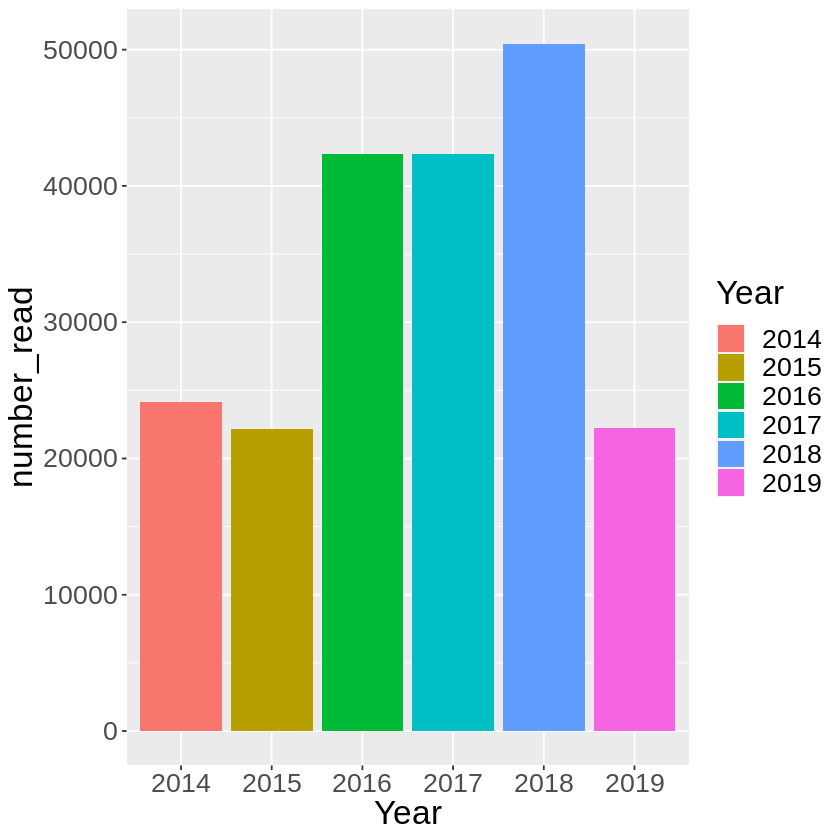

In [ ]:
tab <- data[-c(1)]
tab$ReadSumPerSample <- rowSums(tab)
tab_sample <- merge(metadata["Year"] , tab["ReadSumPerSample"] , by = "row.names")
agg_tab <- aggregate(tab_sample[,2], list(tab_sample$Year), sum) ## sum of relative abundance of different orders in all samples colnames(agg) = c("order1" , "sumAbundance")
colnames(agg_tab) <- c("Year" , "number_read")
agg_tab$Year <- as.factor(agg_tab$Year)

 ggplot()  + geom_bar(data=agg_tab, aes(x=Year, y=number_read, fill = Year), stat="identity") +  theme(text = element_text(size=20))

Now we are using ggplot as outlined above to visualize our data. A CHEAT SHEET to better understand and use ggplot2 can be found here: [open CHEAT SHEET](https://drive.google.com/file/d/1pPZdUGQqfwDOEY7xY7Uw4o6siYVDIORj/view?usp=sharing)
More can be found here: https://ggplot2.tidyverse.org/

##<font color='red'>Q2:</font>

##What is the max number of reads per sample? What is the min? What is the avarage number of reads?

In [ ]:
#answer
#hint: use functions in R such as max()


[1] 111045

## Let’s see the number of reads per OTU in each sample (for the first 5 samples)

In [ ]:
#install required package(reshape2)
install.packages("reshape2")
library(reshape2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




In [ ]:
ra_tab <- data[-c(1)]
ra_tab <- ra_tab[c(1:5),]
ra_tab$ID <- rownames(ra_tab)
melt_tab <- melt(ra_tab)
colnames(melt_tab) = c("ID","OTU","Abundance")
head(melt_tab)
tab_taxa <- merge(x =melt_tab , y = taxonomy , by.x  = "OTU" , by.y = "OTU")
tab_taxa$OTU_Genus = paste(tab_taxa$OTU , tab_taxa$Genus , sep = "_")
tab_taxa$OTU_Genus[tab_taxa$Abundance <= 2000] <- "Other" 
tab_taxa$OTU_Genus <- reorder(tab_taxa$OTU_Genus , tab_taxa$Abundance)
tab_taxa1 <- merge(x =tab_taxa  , y = metadata, by = "ID")
tab_taxa1$Year = as.factor(tab_taxa1$Year)

Using ID as id variables



,ID,OTU,Abundance
,<chr>,<fct>,<int>
1,S324,Otu000002,879
2,S164,Otu000002,4410
3,S400,Otu000002,206
4,S346,Otu000002,230
5,S145,Otu000002,45
6,S324,Otu000003,1632


In [ ]:
#install required package
install.packages(c("htmlwidgets" , "plotly"))
library(htmlwidgets)
library(plotly)

Warning message in dir.create("plots"):
“'plots' already exists”


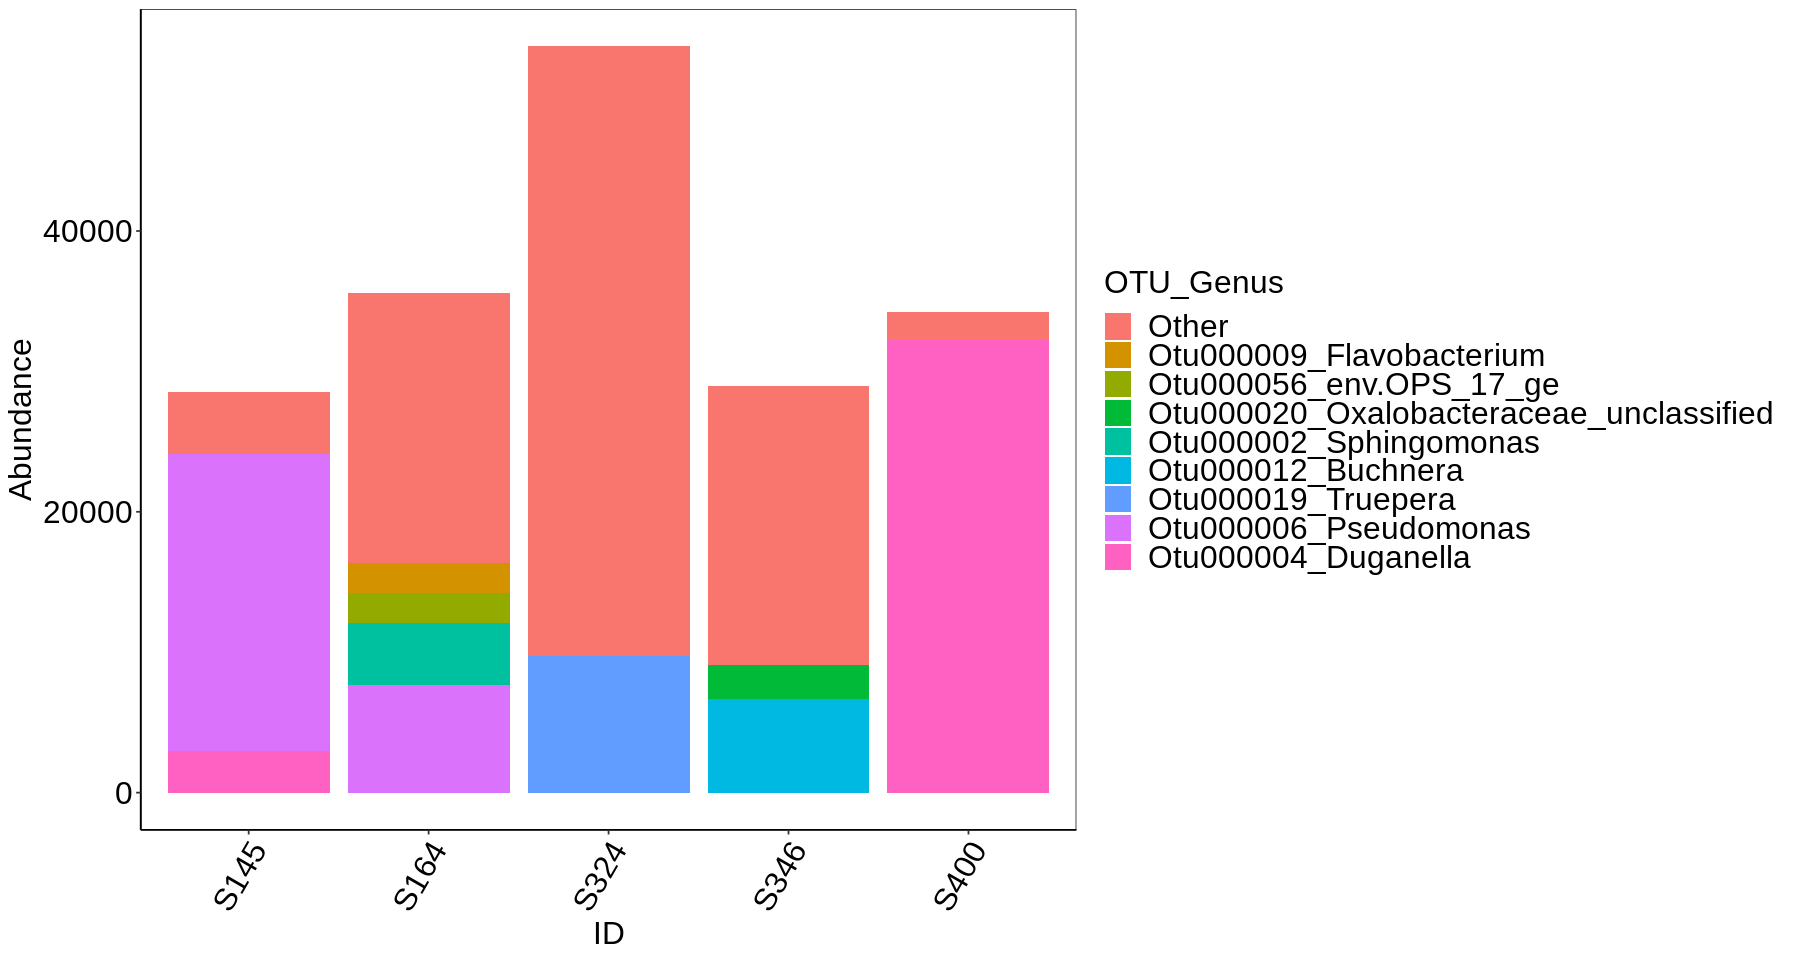

In [ ]:
dir.create("plots")
p2 <- ggplot()  + geom_bar(data=tab_taxa1, aes(x=ID, y=Abundance, fill = OTU_Genus), stat="identity") + scale_color_brewer(palette="Dark2")+
theme_bw() + theme(text = element_text(size = 19 , colour = "black"),
                       axis.text = element_text(size = 19 , colour = "black" ),
                       axis.title = element_text(size = 19 , colour = "black" ),
                       strip.text = element_text(size = 19 , colour = "black" ),
                       axis.text.x = element_text(angle = 60, hjust = 1 , colour="black", size = 19),
                       panel.grid.major = element_blank(),
                       panel.grid.minor = element_blank(), 
                       axis.line = element_line(colour = "black") ,
                       legend.title = element_text(color = "black", size = 19),
                       legend.text = element_text(color = "black", size = 19) ,
                       strip.background = element_rect(colour = "black", fill = "white"))

htmlwidgets::saveWidget(ggplotly(p2), "plots/AbundanceOTU.html")
ggsave("plots/AbundanceOTU.png" , p2, width = 15 , height = 8)
options(repr.plot.width=15, repr.plot.height=8)
p2

##<font color='red'>Q3:</font> 

###What are the most abundant OTUs in each of the samples? Open the plot in plots folder.
###Does it makes sense to campaire samples without normalization?
###How can we normalize the data to compare the samples?

>>
##Normalization approaches for microbiome data:

1.   Rarefying: Subsample taxa without replacement so that all samples have the same library size 
2.   Proportion (Relative abundance): Counts are divided by total library size (scaling between 0 and)

In [ ]:
install.packages("vegan")
library(vegan)

In [ ]:

ra_tab <- decostand(data[-c(1)], method="total", MARGIN=1) # this returns a standardized data frame. Standardization, as contrasted to transformation, means that the entries are transformed relative to other entries.
ra_tab <- ra_tab[1:5,]
ra_tab$ID <- rownames(ra_tab)
melt_tab <- melt(ra_tab)
colnames(melt_tab) = c("ID","OTU","Abundance")
head(melt_tab)
tab_taxa <- merge(x =melt_tab , y = taxonomy , by.x  = "OTU" , by.y = "OTU")
tab_taxa$OTU_Genus = paste(tab_taxa$OTU , tab_taxa$Genus , sep = "_")
tab_taxa$OTU_Genus[tab_taxa$Abundance <= 0.05] <- "Other" 
tab_taxa$OTU_Genus <- reorder(tab_taxa$OTU_Genus , tab_taxa$Abundance)
tab_taxa1 <- merge(x =tab_taxa  , y = metadata, by = "ID")
tab_taxa1$Year = as.factor(tab_taxa1$Year)

Using ID as id variables



,ID,OTU,Abundance
,<chr>,<fct>,<dbl>
1,S324,Otu000002,0.016539967
2,S164,Otu000002,0.123827708
3,S400,Otu000002,0.006012667
4,S346,Otu000002,0.007948027
5,S145,Otu000002,0.001576900
6,S324,Otu000003,0.030709017


##Let's visulize the previous plot on normalize table(relative abundance)

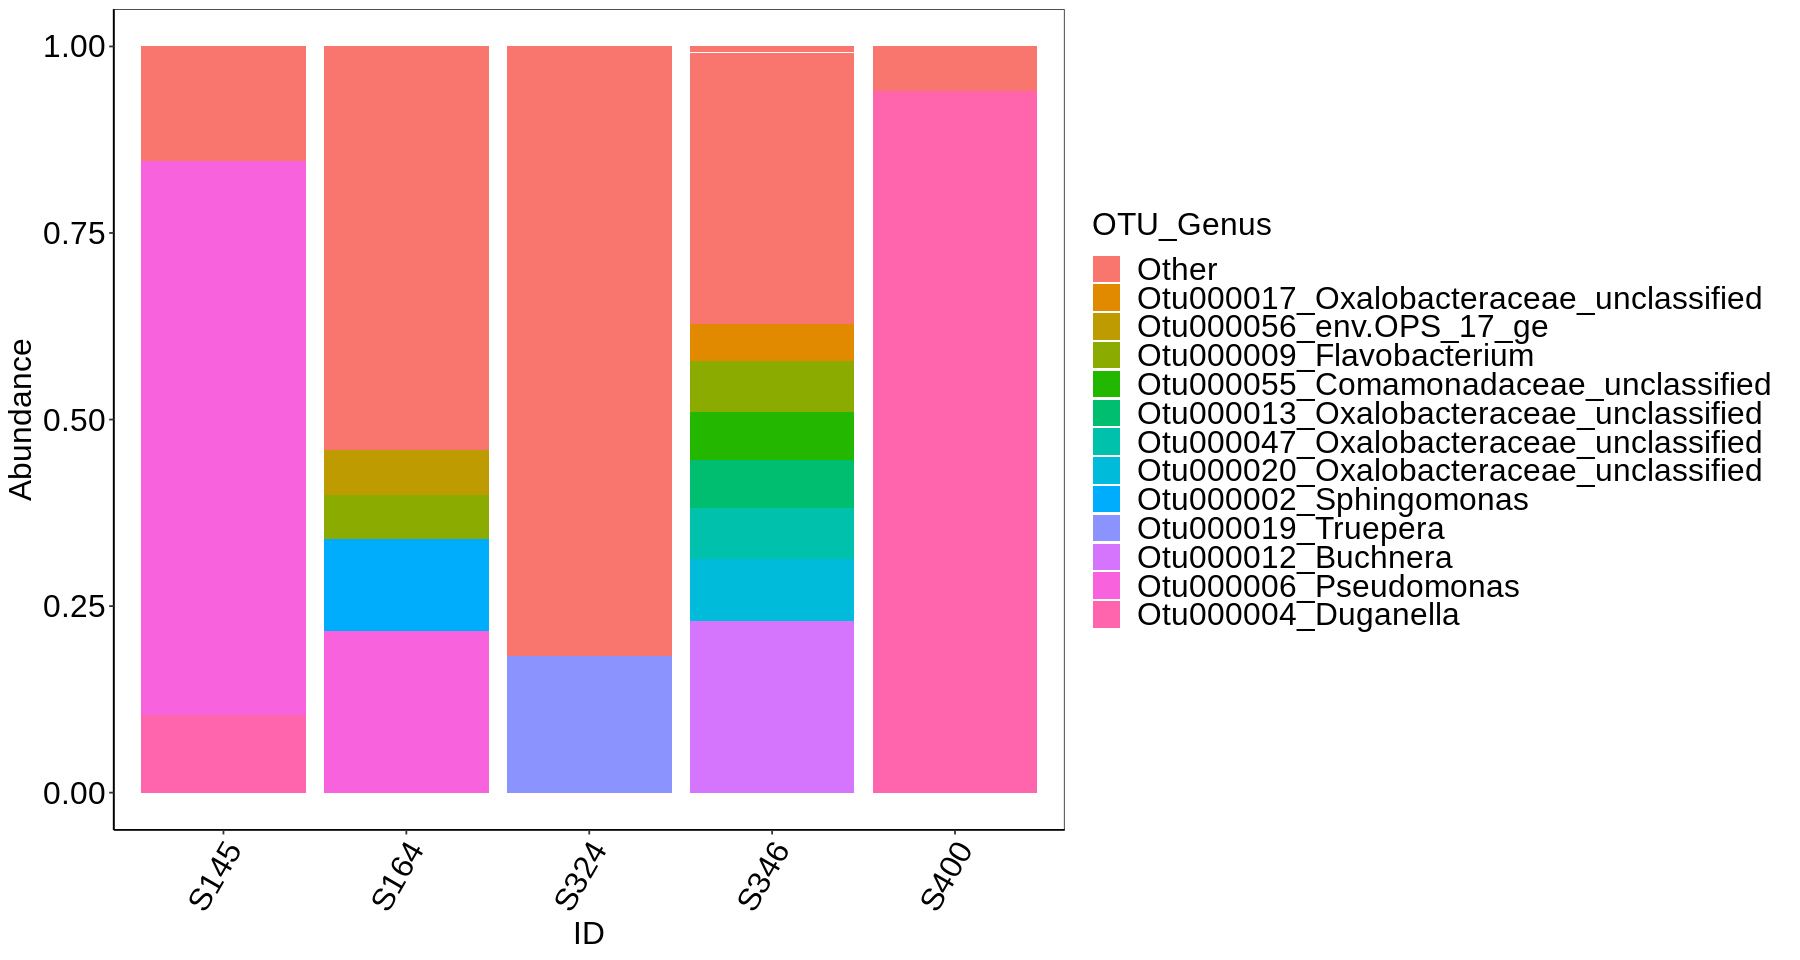

In [ ]:
p3 <- ggplot()  + geom_bar(data=tab_taxa1, aes(x=ID, y=Abundance, fill = OTU_Genus), stat="identity") + scale_color_brewer(palette="Dark2")+
theme_bw() + theme(text = element_text(size = 19 , colour = "black"),
                       axis.text = element_text(size = 19 , colour = "black" ),
                       axis.title = element_text(size = 19 , colour = "black" ),
                       strip.text = element_text(size = 19 , colour = "black" ),
                       axis.text.x = element_text(angle = 60, hjust = 1 , colour="black", size = 19),
                       panel.grid.major = element_blank(),
                       panel.grid.minor = element_blank(), 
                       axis.line = element_line(colour = "black") ,
                       legend.title = element_text(color = "black", size = 19),
                       legend.text = element_text(color = "black", size = 19) ,
                       strip.background = element_rect(colour = "black", fill = "white"))

htmlwidgets::saveWidget(ggplotly(p3), "plots/RelativeAbundanceOTU.html")
ggsave("plots/RelativeAbundanceOTU.png" , p3 , width = 15 , height = 8)
options(repr.plot.width=15, repr.plot.height=8)
p3

##Plot and compaire the compotion of microbioe in "Genus" taxonomic level over years across different Compartments of plant

In [ ]:
ra_tab <- decostand(data[-c(1)], method="total", MARGIN=1) # this returns a standardized data frame. Standardization, as contrasted to transformation, means that the entries are transformed relative to other entries.
ra_tab$ID <- rownames(ra_tab)
melt_tab <- melt(ra_tab)
colnames(melt_tab) = c("ID","OTU","RelativeAbundance")
head(melt_tab)
tab_taxa <- merge(x =melt_tab , y = taxonomy , by.x  = "OTU" , by.y = "OTU")
agg_tab <- aggregate(tab_taxa[,3], list(tab_taxa$Genus), sum) ## sum of relative abundance of different orders in all samples colnames(agg) = c("order1" , "sumAbundance")
#head(agg_tab)
colnames(agg_tab) <- c("Genus","sumAbundance")
agg_tab$Genus1 <- agg_tab$Genus # copy of this col because i want to have main col and change the order of this column to "other" category
agg_tab$Genus1[agg_tab$sumAbundance <= 4] <- "Other" 
#head(agg_tab) 
#length(unique(agg_tab$Genus1))
tab_taxa1 <- merge(tab_taxa, agg_tab ,by ="Genus")  #add the information of changing orders name to main data frame
tab_taxa1$Genus1 <- reorder(tab_taxa1$Genus1 , tab_taxa1$sumAbundance)
tab_taxa1 <- merge(x =tab_taxa1  , y = metadata, by = "ID")
tab_taxa1$Year = as.factor(tab_taxa1$Year)

Using ID as id variables



,ID,OTU,RelativeAbundance
,<chr>,<fct>,<dbl>
1,S324,Otu000002,0.016539967
2,S164,Otu000002,0.123827708
3,S400,Otu000002,0.006012667
4,S346,Otu000002,0.007948027
5,S145,Otu000002,0.001576900
6,S568,Otu000002,0.096379417


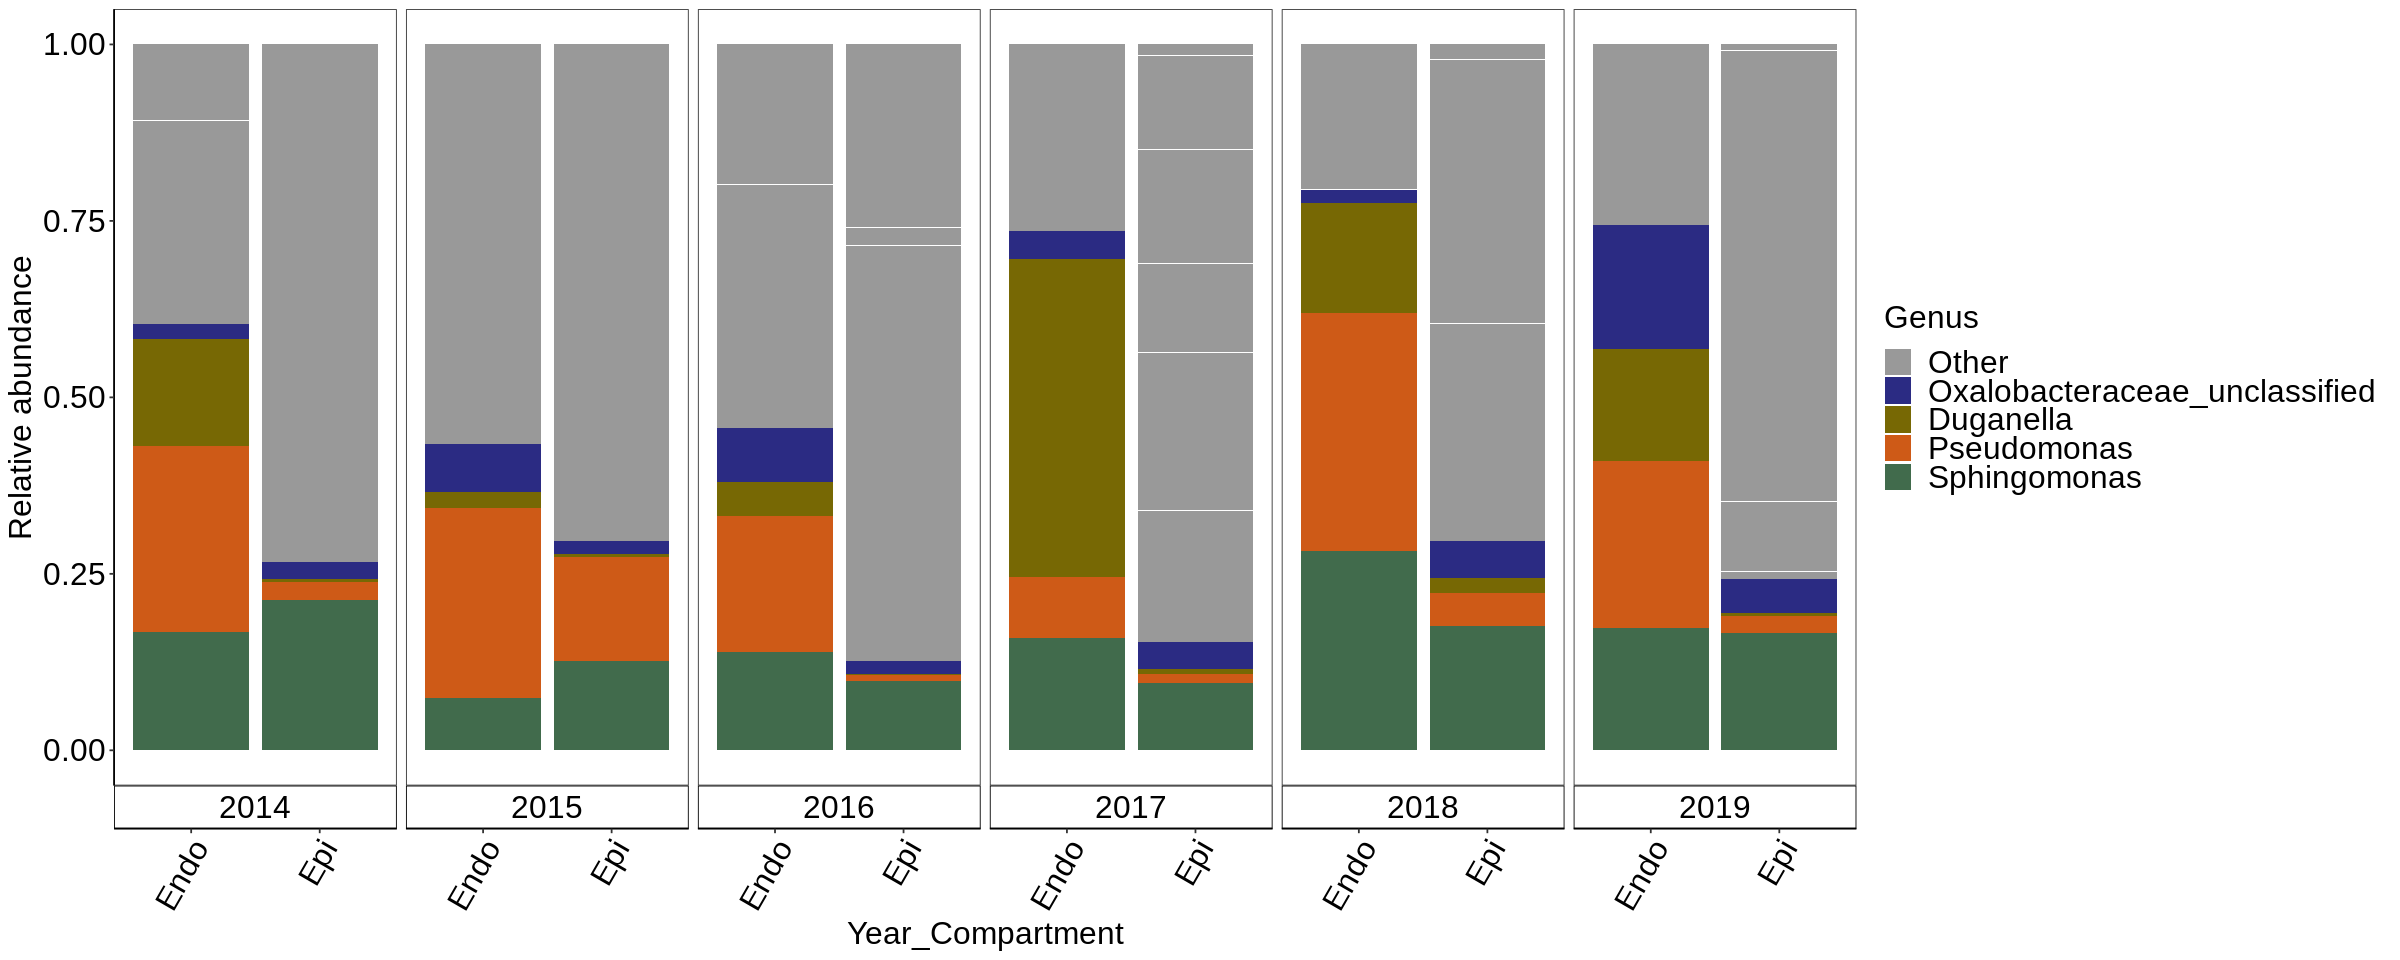

In [ ]:
col <- c("#0F85B0","#FD861E","#F9DA73" , "#16B7B2" , "#AF65B2","#905E45","#416B4C","#CE5A17","#776804","#2B2B83","#999999")

p4 <- ggplot()  + geom_bar(data=tab_taxa1, aes(x=Compartment, y=RelativeAbundance, fill = Genus1), stat="identity", position="fill") +
    facet_wrap(.~ Year, scales = 'free_x' , nrow = 1 , strip.position="bottom")  +
    scale_fill_manual(values=rev(col)) +
    guides(fill=guide_legend(ncol=1))  + 
    theme_bw() + theme(text = element_text(size = 19 , colour = "black"),
                       axis.text = element_text(size = 19 , colour = "black" ),
                       axis.title = element_text(size = 19 , colour = "black" ),
                       strip.text = element_text(size = 19 , colour = "black" ),
                       axis.text.x = element_text(angle = 60, hjust = 1 , colour="black", size = 19),
                       panel.grid.major = element_blank(),
                       panel.grid.minor = element_blank(), 
                       axis.line = element_line(colour = "black") ,
                       legend.title = element_text(color = "black", size = 19),
                       legend.text = element_text(color = "black", size = 19) ,
                       strip.background = element_rect(colour = "black", fill = "white")) +
         ylab("Relative abundance") + xlab("Year_Compartment") + labs(fill = "Genus")
options(repr.plot.width=20, repr.plot.height=8)
#ggplotly(p1)
ggsave("plots/Genus_RA_Plot.png" , p4 , height = 10 , width = 20)
p4
htmlwidgets::saveWidget(ggplotly(p4), "plots/Genus_RA_Plot.html")

##Do you see any differences between Genus in epyhitic and endophytic samples? do you think is it significant?

##Compair Genus in epyhitic and endophytic (2 group) samples using Wilcoxon signed-rank test

In [ ]:
wilcox.test(RelativeAbundance ~ Compartment, data = tab_taxa1)


	Wilcoxon rank sum test with continuity correction

data:  RelativeAbundance by Compartment
W = 966367357, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


##Compair Genus among years (more than 2 groups) anova test and Tukey HSD Test

In [ ]:
anova <- aov(RelativeAbundance ~ Genus1, data = tab_taxa1)
summary(anova)
TukeyHSD(aov(RelativeAbundance ~ Genus1, data = tab_taxa1))


                Df Sum Sq Mean Sq F value Pr(>F)    
Genus1           4  0.682 0.17049   920.4 <2e-16 ***
Residuals   104025 19.268 0.00019                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = RelativeAbundance ~ Genus1, data = tab_taxa1)

$Genus1
                                                   diff           lwr
Oxalobacteraceae_unclassified-Other         0.002200627  0.0013218693
Duganella-Other                             0.069450630  0.0657546895
Pseudomonas-Other                           0.011507206  0.0103870969
Sphingomonas-Other                          0.003950617  0.0032966881
Duganella-Oxalobacteraceae_unclassified     0.067250003  0.0634547468
Pseudomonas-Oxalobacteraceae_unclassified   0.009306579  0.0078928475
Sphingomonas-Oxalobacteraceae_unclassified  0.001749990  0.0006675781
Pseudomonas-Duganella                      -0.057943424 -0.0618017140
Sphingomonas-Duganella                     -0.065500014 -0.0692495974
Sphingomonas-Pseudomonas                   -0.007556589 -0.0088426861
                                                    upr     p adj
Oxalobacterace

##<font color='red'>Q4:</font> 

##Plot and compaire the compotion of microbioe in "Family" taxonomic level between infected and non-infected samples("Infection_stage)

##Is threre any significantly differences?

In [ ]:
#type your answer

## Calculate within sample diversity (alpha-diiversity) and plot it

In [ ]:
#Diversity
alpha_div <- data.frame(diversity(data[-c(1)] , index ="shannon"))
colnames(alpha_div) = "ShannonDiversity"
alpha_div <- merge(alpha_div , metadata , by = "row.names")
head(alpha_div)



,Row.names,ShannonDiversity,ID,Compartment,Year,Season,Infection_Stage
,<I<chr>>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>
1,S100,1.9248637,S100,Endo,2014,Fall,Healthy
2,S105,0.1208938,S105,Endo,2015,Spring,Healthy
3,S111,0.5144329,S111,Endo,2015,Fall,Healthy
4,S112,0.8970793,S112,Endo,2015,Fall,Healthy
5,S113,1.3894845,S113,Endo,2015,Fall,Healthy
6,S116,2.8538525,S116,Endo,2016,Spring,Healthy


In [ ]:
#alpha_div
install.packages("ggpubr")
library(ggpubr)

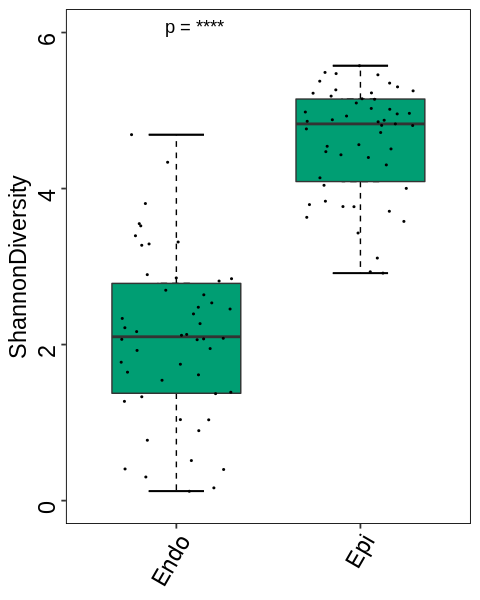

In [ ]:
plot_alpha_diversity <- ggplot( alpha_div, aes(x = Compartment , y = ShannonDiversity))  + 
    geom_boxplot( fill='#009E73', color="black"  , outlier.shape=NA ,width=0.2 , lwd = 0.4 ,linetype = "dashed" , 
                  position = position_dodge(width=6))  + 
    stat_boxplot(aes(ymin = ..lower.., ymax = ..upper..) ,fill='#009E73' ,outlier.shape=NA ,width=0.7 , lwd = 0.4) +
    stat_boxplot(geom = "errorbar", aes(ymin = ..ymax..), width=0.3) +
    stat_boxplot(geom = "errorbar", aes(ymax = ..ymin..) ,width=0.3) + 
    geom_jitter(alpha = 1 , color = "black" , position = position_jitter(width = 0.3) , size = 0.2) + 
    theme(axis.text.x = element_text(angle = 60, hjust = 1 , colour="black", size = 14), 
          axis.text.y = element_text(angle=90, hjust=1 , size = 14 , colour="black" ) , 
          axis.title.y =  element_text(angle=90, size = 14) ,
          axis.title.x = element_blank() ,
          panel.background = element_rect(colour = "black" , fill = "NA"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank()) + ylim(0,6) +
    stat_compare_means(aes(label = paste0("p = ", ..p.signif..)) , method = "wilcox.test")
options(repr.plot.width=4, repr.plot.height=5)
plot_alpha_diversity

In [ ]:
wilcox.test(ShannonDiversity ~ Compartment, data = alpha_div)


	Wilcoxon rank sum test with continuity correction

data:  ShannonDiversity by Compartment
W = 66, p-value = 2.239e-16
alternative hypothesis: true location shift is not equal to 0


Most used alpha-diversity indices are:

- Simpson index: is a dominance index because it gives more weight to common or dominant species. In this case, a few rare species with only a few representatives will not affect the diversity.   
- Shannon index: is an information statistic index, which means it assumes all species are represented in a sample and that they are randomly sampled. 
- Chao index: is calculated like normal species richness but takes into account the size of the sample and the probability to miss some species (applies a correction for this).

##<font color='red'>Q5:</font> 
##Calculate within sample diversity (alpha diversity) between infected and non-infected samples

##Is there significantly differences?

In [ ]:
#your answer

## Calculate between sample diversity (beta-diversity) and plot it

While alpha-diversity represents the diversity within an ecosystem or a sample, beta-diversity represents the difference between two ecosystems/samples. In other word, how similar or different are two ecosystems or samples? So, beta-diversity is a distance between two samples. Microbial ecologists do not use Euclidean distances but usually use Bray-Curtis, Jaccard or weight/unweight Unifrac distances to estimate the betadiversity.

- Bray-Curtis dissimilarity: based on occurrence data (abundance)
- Jaccard distance: based on presence/absence data (does not include abundance information).
- UniFrac distances: take into account the occurrence table and the phylogeny diversity (sequence distance). Weighted or unweighted UniFrac distances depending if taking into account relative abundance or only presence/absence.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘pixmap’


Warning message in dudi.pco(vegdist(data[-c(1)], method = "bray", binary = FALSE), :
“Non euclidean distance”


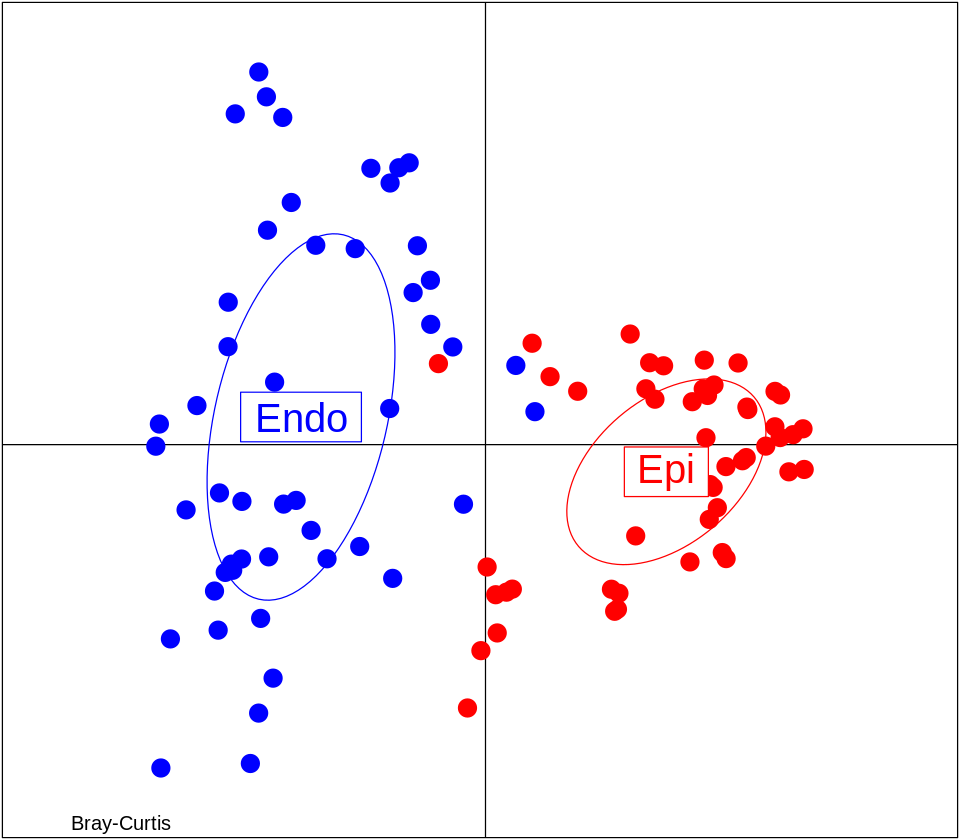

In [ ]:
install.packages("ade4")
library(ade4)

pca_bray_rarefied.tab <- dudi.pco(vegdist(data[-c(1)], method="bray", binary=FALSE), scannf=F)
metadata$Compartment <- as.factor(metadata$Compartment)
options(repr.plot.width=8, repr.plot.height=7)
s.class(pca_bray_rarefied.tab$li, metadata$Compartment, xax=1, yax=2, cpoint=3, grid=F, addaxes=T, cellipse=1, cstar=0, axesell=0, col = c("blue","red"), clabel = 2, sub="Bray-Curtis")

To test whether the groups are different with respect to centroid and dispersion, a PERMANOVA statistical test is performed. For this a multivariate extension of ANOVA will be used, as there are many OTUs that will be used in the test. The extension is based on distances between samples. The test compares distances of samples within the same group to distances of samples from different groups. If the distance between samples from the different groups is much larger than samples from the same group, we conclude that the groups are not equal.

In order to test the significance of the result, a permutation test is used. Thus all samples are randomly mixed over the groups and the test is repeated many times. If the ratio (between group distance / within group distance) is much larger for the original data than for the permutations, we conclude there is a statistical significant difference.

The test can be applied in combination with any distance measure.

In [ ]:
# Permanova test using the vegan package
ado <- adonis2(data[-c(1)]~metadata$Compartment, permutations=999, method="bray")
ado

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
metadata$Compartment,1,5.07333,0.1516045,17.69086,0.001
Residual,99,28.39092,0.8483955,NA,NA
Total,100,33.46425,1.0000000,NA,NA


##<font color='red'>Q6:</font> 
##Calculate between sample diversity (beta diiversity) between infected and non-infected samples among epi and endo samples

##how much variation of data are explained by infection in the plants?

In [ ]:
#your answer

## Network analysis
Calculate the corelation between OTU's using Fastspar pakage


In [ ]:

data_net <- data.frame(t(data[-c(1)]))
dim(data_net)
data_net$OTU <- rownames(data_net)
data_net <- merge(taxonomy[c("OTU" ,"Genus")] , data_net , by = "OTU")
data_net$OTU_Genus <- paste(data_net$OTU , data_net$Genus , sep = "_")
rownames(data_net) <- data_net$OTU_Genus
data_net <- subset(data_net , select = -c(OTU , Genus , OTU_Genus))
data_net <- data_net[rowSums(data_net)>=500 , ]
dim(data_net)
head(data_net)
data_net = tibble::rownames_to_column(data_net, "#OTU ID")
write.table(data_net, "data_net.txt", quote = F , sep = "\t" , col.names = T , row.names = F)

[1] 1030  101

[1] 255 101

,S324,S164,S400,S346,S145,S568,S389,S459,S566,S579,⋯,S701,S645,S604,S286,S608,S609,S698,S643,S685,S652
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Otu000002_Sphingomonas,879,4410,206,230,45,2654,18878,714,458,1038,⋯,990,541,123,107,0,282,380,274,899,1868
Otu000003_Methylobacterium-Methylorubrum,1632,1123,4,179,148,136,968,2418,3,38,⋯,425,92,115,176,43,35,85,263,442,82
Otu000004_Duganella,22,82,32232,1363,2960,8759,1091,77,8,2664,⋯,33,217,43,0,154,514,19,306,12,7
Otu000005_Pseudomonas,5,1087,0,259,134,214,1157,291,3,14513,⋯,152,121,69,60,6,23,93,39,30,7
Otu000006_Pseudomonas,20,7691,184,1,21187,415,260,528,23813,1457,⋯,230,10,1,0,0,457,168,0,0,1
Otu000009_Flavobacterium,678,2096,145,1969,0,5556,378,117,6,134,⋯,137,43,115,214,17,2225,248,564,2,8


##calculate correlation matrix using FastSpar program

FastSpar(github.com/scwatts/FastSpar) was used to calculate correlation matrix

## Install FastSpar:
```
conda create --name fastspar  -c bioconda -c conda-forge fastspar
```
## activate environment

```
conda activate fastspar
```

## step1: Correlation inference
```
mkdir bootstrap_counts bootstrap_correlation
```
```
fastspar --otu_table data_net.txt --correlation median_correlation.tsv --covariance median_covariance.tsv > log1
```
## step2: Calculation of exact p-values, first generate 100 bootstrap counts
```
fastspar_bootstrap --otu_table data_net.txt --number 100 --prefix bootstrap_counts/ > log2
```
## step3: infer correlations for each bootstrap count (running in parallel):
```
parallel -j 4 fastspar --otu_table {} --correlation bootstrap_correlation/cor{/} --covariance bootstrap_correlation/cov{/} -i 50 ::: bootstrap_counts/* > log3
```
## step4: From these correlations, the p-values are then calculated:
```
fastspar_pvalues --otu_table data_net.txt --correlation median_correlation.tsv --prefix bootstrap_correlation/cor --permutations 100 --outfile pvalues.tsv > log4
```

##path to output files
https://github.com/IshtarMM/spp_course22/Network

## Back to R and open output files of network. To subset significant correlations among OTUS


In [ ]:
#open correlation and pvalue files
Pvals <- read.table(file = "Network/pvalues.tsv", sep="\t", header=T, row.names=1,  comment.char = "") 
Pvals1 <- as.matrix(Pvals)
Pvals1[upper.tri(Pvals, diag=TRUE)]<- NA
Pvals2 <- as.data.frame(as.table(Pvals1))
colnames(Pvals2)<-c("Node1","Node2","Pvalue")
  
Cors <- read.table("Network/median_correlation.tsv", sep="\t", header=T, row.names=1 , comment.char = "") 
Cors1 <- as.matrix(Cors)
Cors1[upper.tri(Cors1, diag=TRUE)]<-NA
Cors2 <- as.data.frame(as.table(Cors1))
colnames(Cors2)<-c("Node1","Node2","Cor")
  
Edge_table <- cbind(Pvals2,Cors2$Cor, deparse.level=2)
Edge_table_final <- Edge_table[!is.na(Edge_table$Pvalue),]
colnames(Edge_table_final) <- c("Node1","Node2","Pvalue","Cor")
Edge_table_final <- subset(Edge_table_final,abs(Edge_table_final$Cor)>=0.2)
Edge_table_final$CorrB <- ifelse(Edge_table_final$Cor >=0, "Positive", "Negative")
Edge_table_final$CorRange <- ifelse(abs(Edge_table_final$Cor) >=0.4, "Strong", "Weak")
Edge_table_final_P0.01 <- Edge_table_final[which(Edge_table_final$Pvalue<=0.01),]
Edge_table_final_P0.01 <- Edge_table_final[which(Edge_table_final$CorRange=="Strong"),]
table(Edge_table_final_P0.01$CorrB)
#Edge_table_final_P0.01$CorrStrong = paste(Edge_table_final_P0.01$CorrB , Edge_table_final_P0.01$CorRange , sep = "_")
write.table(Edge_table_final_P0.01, file="Network/0.01Pvalue_correlation.txt", sep="\t", row.names=FALSE , quote = F)


Negative Positive 
      77      368 

In [ ]:
#plot hub
n <- 5 #threshold for Hub
library(ggrepel)
net_analysis <- read.table("Network/node.csv" , header = TRUE , sep = "," )
top5_BC <- net_analysis[net_analysis$BetweennessCentrality > quantile(net_analysis$BetweennessCentrality,prob=1-n/100),]$name

top5_BC_min<-min(net_analysis[net_analysis$BetweennessCentrality > quantile(net_analysis$BetweennessCentrality,prob=1-n/100),]$BetweennessCentrality)

top5_CC<-net_analysis[net_analysis$ClosenessCentrality > quantile(net_analysis$ClosenessCentrality,prob=1-n/100),]$name
  
top5_CC_min<-min(net_analysis[net_analysis$ClosenessCentrality > quantile(net_analysis$ClosenessCentrality,prob=1-n/100),]$ClosenessCentrality)
  
p5_Intersection <- top5_BC[which((top5_BC %in% top5_CC) == TRUE)]
  
p5_IntersectionH = p5_Intersection
length(p5_IntersectionH)
core = as.data.frame(p5_IntersectionH)
core$core = "yes"
colnames(core) = c("Species" , "Hub")
select = subset(net_analysis, !(name %in% core$Species))
select$core = "No"
select1 = select[,c("name","core")] #take name and core info
colnames(select1) = c("Species" , "Hub")
newnet_analysis = rbind(select1 , core)
#newnet_analysis$sort = seq(1,nrow(newnet_analysis))
newnet_analysisH = merge(x = net_analysis , y = newnet_analysis , by.x = "name" , by.y = "Species")
expression <- ggplot(newnet_analysisH, aes(x = ClosenessCentrality, y= BetweennessCentrality , label=name)) 
z <- expression + geom_point(aes(colour=Degree , size = Degree) ,stat= "identity",position="identity",alpha= 0.4 ) + 
    scale_colour_gradient(low = "blue", high = "red") + 
    labs(title = "Hub analysis") +
    scale_size_area(max_size = 10)+
    geom_vline(xintercept = top5_CC_min, linetype="dashed") +
    geom_hline(yintercept = top5_BC_min, linetype= "dashed") +
    scale_x_continuous("Closeness Centrality") +
    scale_y_continuous("Betweenness Centrality") +
    scale_shape_manual(values=c(21, 19)) +
    geom_text_repel(data=subset(newnet_analysisH, Hub=="yes"),size = 7,
                    box.padding   = 1.5,
                    point.padding = 0.5,
                    force         = 100,
                    segment.size  = 0.4,
                    segment.color = "darkgreen") +
    theme_bw()+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank()) + 
    theme(text = element_text(size=15))



[1] 4

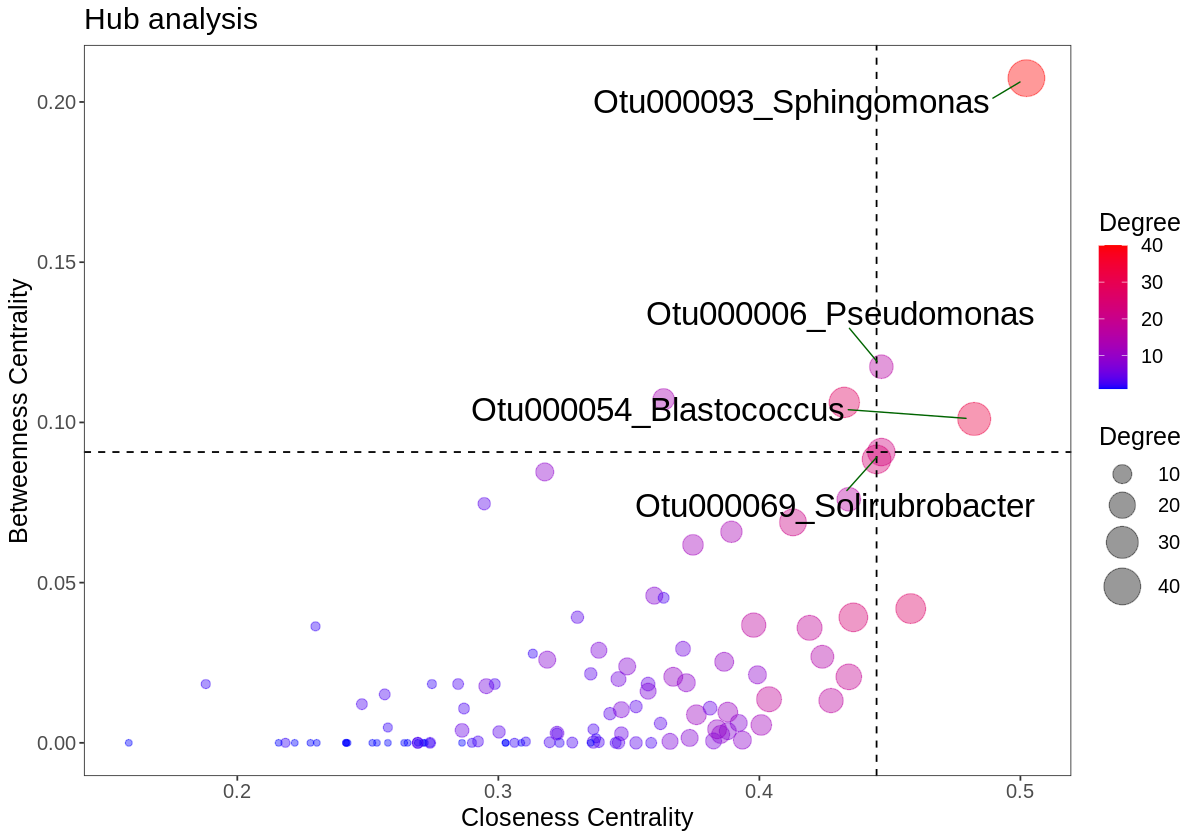

In [ ]:
options(repr.plot.width=10, repr.plot.height=7)
z

##<font color='red'>Q7:</font> 
##Calculate network analysis for infected samples

In [ ]:
#type your answer
#hint: first subset the otu table of infected samples 
metadata_infected_samples <- subset(metadata , metadata$Infection_Stage=="Infected")
data1 <- data[rownames(data)%in% rownames(metadata_infected_samples), ]
data_net <- data.frame(t(data1[-c(1)]))
#now you have the table of infected samples 
#continue...

ERROR: ignored

**Outlook: Machine learning models**


An approach to identify underlying microbial community patterns for infection and season using machine learning.

<img src="https://github.com/IshtarMM/Practical_Course/blob/master/pic/machinelearning.jpg?raw=true" />
